In [ ]:
import json
import spacy

In [ ]:
with open('/content/annotations_2.json') as fp:
  training_data = json.load(fp)

In [ ]:
training_data

{'classes': ['DATE',
  'NAME',
  'TIME_PERIOD',
  'MEDICINE',
  'HEALTH_ISSUE',
  'HEALTH_METRIC'],
 'annotations': [['Record date: 2080-02-18\r',
   {'entities': [[13, 23, 'DATE']]}],
  ['\r', {'entities': []}],
  ['SDU JAR Admission Note\r', {'entities': []}],
  ['\r', {'entities': []}],
  ['Name: \t Yosef Villegas\r',
   {'entities': [[8, 13, 'NAME'], [14, 22, 'NAME']]}],
  ['MR:\t8249813\r', {'entities': []}],
  ['DOA:  \t2/17/80\r', {'entities': [[7, 14, 'DATE']]}],
  ['PCP:  Gilbert Perez\r', {'entities': [[6, 13, 'NAME'], [14, 19, 'NAME']]}],
  ['CODE: FULL\r', {'entities': []}],
  ['\r', {'entities': []}],
  ['HPI:  70 yo M with NIDDM admitted for cath after positive MIBI. Pt has had increasing CP and SOB on exertion for past two months, seen at PCP on 2/03 with EKG showing RBBB. Pt was scheduled for stress MIBI today to eval for cardiac ischemia. MIBI was reportedly stopped 2/2 to chest pain, though pt denies having pain during procedure. MIBI was read as positive for moderate

In [ ]:
nlp = spacy.blank('en')
nlp.vocab.vectors.name = 'mdrec'
nlp.add_pipe('ner',last=True)

In [ ]:
for label in training_data["classes"]:
  nlp.get_pipe("ner").add_label(label)

print(nlp.get_pipe("ner").label_data, nlp.get_pipe("ner").is_trainable)

{1: Counter({'DATE': -1, 'NAME': -2, 'TIME_PERIOD': -3, 'MEDICINE': -4, 'HEALTH_ISSUE': -5, 'HEALTH_METRIC': -6}), 2: Counter({'DATE': -1, 'NAME': -2, 'TIME_PERIOD': -3, 'MEDICINE': -4, 'HEALTH_ISSUE': -5, 'HEALTH_METRIC': -6}), 3: Counter({'DATE': -1, 'NAME': -2, 'TIME_PERIOD': -3, 'MEDICINE': -4, 'HEALTH_ISSUE': -5, 'HEALTH_METRIC': -6}), 4: Counter({'DATE': -1, 'NAME': -2, 'TIME_PERIOD': -3, 'MEDICINE': -4, 'HEALTH_ISSUE': -5, 'HEALTH_METRIC': -6})} True


In [ ]:
optimizer = nlp.begin_training()

In [ ]:
training_data["annotations"]

[['Record date: 2080-02-18\r', {'entities': [[13, 23, 'DATE']]}],
 ['\r', {'entities': []}],
 ['SDU JAR Admission Note\r', {'entities': []}],
 ['\r', {'entities': []}],
 ['Name: \t Yosef Villegas\r',
  {'entities': [[8, 13, 'NAME'], [14, 22, 'NAME']]}],
 ['MR:\t8249813\r', {'entities': []}],
 ['DOA:  \t2/17/80\r', {'entities': [[7, 14, 'DATE']]}],
 ['PCP:  Gilbert Perez\r', {'entities': [[6, 13, 'NAME'], [14, 19, 'NAME']]}],
 ['CODE: FULL\r', {'entities': []}],
 ['\r', {'entities': []}],
 ['HPI:  70 yo M with NIDDM admitted for cath after positive MIBI. Pt has had increasing CP and SOB on exertion for past two months, seen at PCP on 2/03 with EKG showing RBBB. Pt was scheduled for stress MIBI today to eval for cardiac ischemia. MIBI was reportedly stopped 2/2 to chest pain, though pt denies having pain during procedure. MIBI was read as positive for moderate to severe inferior ischemia and pt was referred to the ED for admission and catheterization.\r',
  {'entities': [[86, 88, 'HEALTH

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
import spacy
import random
nlp = spacy.load('en_core_web_sm')

In [ ]:
with open('/content/dataset_0.txt','r') as f:
  text1 = f.read()

In [ ]:
doc = nlp(text1)
for ent in doc.ents:
    print(ent.text,ent.label_)

2069-04-07 CARDINAL
Villegas PERSON
today DATE
November DATE
About three weeks ago DATE
Atenolol ORG
1 Hydroxychloroquine QUANTITY
today DATE
BP 120/80 ORG
ROM ORG
Clinical Impression ORG
1 MONEY
Inflammatory PERSON
RA ORG
Hydroxychloroquine PERSON
2 MONEY
1 CARDINAL
Xzavian G. Tavares PERSON
M.D.
XGT PERSON


In [ ]:
optimizer = nlp.get_pipe("ner").create_optimizer()

In [ ]:
from spacy.training.example import Example

test=[]
for i in range(20):
    random.shuffle(training_data["annotations"])
    for text, annotations in training_data["annotations"]:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        nlp.update([example],drop=0.3, sgd=optimizer)
        test.append(example)


In [ ]:
for text, annotations in training_data["annotations"]:
    print(text,annotations,len(text),len([annotations]))

 {'entities': []} 23 1
 {'entities': [[0, 15, 'MEDICINE'], [16, 20, 'MEDICINE'], [22, 29, 'MEDICINE']]} 44 1
 {'entities': [[6, 13, 'NAME'], [14, 19, 'NAME']]} 20 1
 {'entities': []} 66 1
 {'entities': []} 66 1
 {'entities': [[1, 9, 'HEALTH_ISSUE'], [14, 20, 'HEALTH_ISSUE'], [68, 76, 'HEALTH_ISSUE']]} 79 1
 {'entities': []} 66 1
 {'entities': []} 9 1
 {'entities': []} 1 1
 {'entities': [[4, 5, 'HEALTH_METRIC'], [13, 15, 'HEALTH_METRIC'], [21, 23, 'HEALTH_METRIC'], [33, 35, 'HEALTH_METRIC'], [41, 44, 'HEALTH_METRIC']]} 54 1
 {'entities': []} 1 1
 {'entities': []} 42 1
 {'entities': [[0, 14, 'HEALTH_ISSUE']]} 16 1
 {'entities': [[6, 23, 'HEALTH_ISSUE']]} 25 1
 {'entities': [[32, 41, 'TIME_PERIOD'], [65, 74, 'TIME_PERIOD']]} 75 1
 {'entities': []} 66 1
 {'entities': []} 1 1
 {'entities': [[13, 33, 'HEALTH_ISSUE']]} 35 1
 {'entities': [[27, 31, 'HEALTH_ISSUE']]} 32 1
 {'entities': [[83, 92, 'HEALTH_ISSUE'], [177, 185, 'HEALTH_ISSUE'], [220, 228, 'HEALTH_ISSUE']]} 277 1
 {'entities': []} 1 

In [ ]:
doc = nlp(text1)
for ent in doc.ents:
    print(ent.text,ent.label_)

2069-04-07 DATE
Villegas NAME
November DATE
three weeks TIME_PERIOD
weight. HEALTH_ISSUE
Atenolol MEDICINE
Hydroxychloroquine NAME
tablet MEDICINE
BP HEALTH_METRIC
carotid. HEALTH_ISSUE
Prednisone. HEALTH_ISSUE
symptoms. HEALTH_ISSUE
per day TIME_PERIOD
Xzavian NAME
G. NAME
DD HEALTH_METRIC
DT HEALTH_METRIC


In [ ]:
import spacy.displacy as displacy

In [ ]:
displacy.render(doc,style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[&lt;TEXT&gt;</br></br></br>Record date: \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    2069-04-07\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n</br></br> </br> </br> </br>Mr. \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Villegas\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">NAME</span>\n</mark>\n is seen today.  I have not seen him since \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    November\n    <span style="font-size: 0.8em; font-weight: bold; lin

In [ ]:
teee = displacy.render(doc,style='ent')
from IPython.display import display, HTML
display(HTML(teee))

In [ ]:
def replace_name (token):
    if token.ent_iob != 0 and token.ent_type_ == "NAME":
        return "[Name]"
    elif token.ent_iob!=0 and token.ent_type_ == "DATE":
        return "[DATE]"
        # elif token.ent_iob!=0 and token.ent_type_ == "HEALTH_ISSUE":
        # return "[HEALTH_ISSUE]"
    else:
        return token.text

In [ ]:
def scrub(text):
    docx=nlp(text)
    with doc.retokenize() as retokenizer:
        for ent in docx.ents:
            retokenizer.merge(ent)
    tokens = map(replace_name,docx)
    result = " ".join(tokens)
    return result

In [ ]:
doc1 = scrub(text1)

In [ ]:
displacy.render(nlp(doc1),style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">[ &lt; TEXT &gt; </br></br></br> Record date : [DATE] [DATE] [DATE] [DATE] [DATE] </br></br> </br> </br> </br> Mr. [Name] is seen today .   I have not seen him since [DATE] . </br> About \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    three weeks\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">TIME_PERIOD</span>\n</mark>\n ago he stopped his Prednisone on his own because </br> he was gaining weight .   He does feel that his shoulders are </br> definitely improved .   It is unclear what he is actually taking , but </br> I think based on the color of his pills and the timing of the </br> medication that he continues taking his \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35e

In [ ]:
deid=displacy.render(nlp(doc1),style='ent')
from IPython.display import display, HTML
display(HTML(deid))

{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'tag_acc': None, 'sents_p': 1.0, 'sents_r': 1.0, 'sents_f': 1.0, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'lemma_acc': None, 'ents_p': 1.0, 'ents_r': 1.0, 'ents_f': 1.0, 'ents_per_type': {'MEDICINE': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'HEALTH_ISSUE': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'NAME': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'TIME_PERIOD': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'DATE': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'HEALTH_METRIC': {'p': 1.0, 'r': 1.0, 'f': 1.0}}, 'speed': 5005.150085303719}


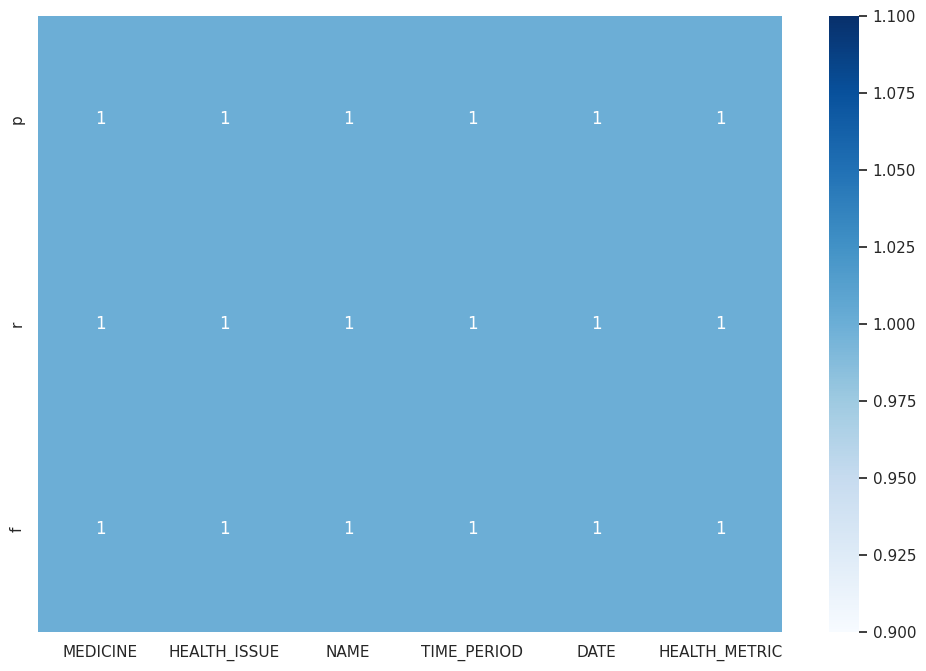

In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={"figure.figsize":(12,8)})

df = pd.DataFrame(nlp.evaluate(test)['ents_per_type'])

g = sns.heatmap(df, cmap="Blues", annot=True, fmt='g')
g.get_figure().savefig("heatmap.png")

print(nlp.evaluate(test))

[<TEXT>


Record date: 2090-02-14

EDVISIT^56040785^OROZCO, KYLE^02/14/90^CHANEY, QUENTIN
CHIEF COMPLAINT:  Chest pain.

I confirm that I have interviewed and examined the patient,

reviewed the resident's documentation on the patient's chart, and

discussed the evaluation, plan of care, and disposition with the

patient.

HISTORY OF PRESENT ILLNESS:  In essence, this is a pleasant

65-year-old male with known history of CAD who presents

complaining of some chest discomfort that began tonight while

walking, took 2 nitro and the pain got better.  Then, had a

repeat episode relived by nitro again.  Picked up by EMS.  Given

aspirin as well.  He describes the pain as 8/10, sharp, left

sided, substernal, and deep.  No diaphoresis, no nausea, no

vomiting, and some shortness of breath associated with it.

PAST MEDICAL HISTORY:  Hypertension, diabetes, CAD, and

peripheral vascular disease.

SOCIAL HISTORY:  He is a past smoker, occasional drinker.  Lives

with family.

FAMILY HISTORY:  Noncontributory.

PAST SURGICAL HISTORY:  Angioplasty with multiple stents and an

A-fem bypass in 2074.

REVIEW OF SYSTEMS:  Per HPI.

ALLERGIES:  Does not have any allergies.

MEDICATIONS:  He is on multiple medications which include Plavix,

Zocor, aspirin, Norvasc, enalapril, NovoLog, Lasix, Neurontin,

and Lantus.

PHYSICAL EXAMINATION:  Pulse of 90, respirations 16, blood

pressure 186/56, oxygen saturation 97%, and temperature is 97.4.

HEENT is atraumatic, normal to inspection, normal pharynx.  Neck

is supple.  Lungs are clear.  Cardiovascular:  Regular rate and

rhythm with no murmurs or gallops.  Abdomen is soft, nontender

with no organomegaly or masses.  Skin is warm, dry, and intact.

LABORATORY DATA:  White count 6.8, hematocrit 34.1, and platelet

count of 229,000.  BUN 45, creatinine 1.7 up from 1.3, and

glucose 420.  Cardiac enzymes were negative.  INR is 1.  EKG

shows no acute ST-T changes.  Chest x-ray was normal.

EMERGENCY DEPARTMENT COURSE:  At this time, we have spoken with

the patient's primary physician and given the patient's cardiac

history, his hypertension, and worsening kidney function, we

believe that he will be better served as an inpatient.

PRIMARY DIAGNOSIS:  Chest pain, rule out acute coronary syndrome.

DISPOSITION:  Admit to hospital.

CONDITION:  Stable

______________________________

CHANEY, QUENTIN M.D.

D: 02/15/90

T: 02/15/90

Dictated By: CHANEY, QUENTIN
eScription document:7-9617124 SJZvdbs

 ******** Not reviewed by Attending Physician ********





</TEXT>]

In [ ]:
doc = nlp("my name is george.")

In [ ]:
for ent in doc.ents:
    print(ent.text,ent.label_)

george NAME


In [ ]:
deid = scrub(doc)

In [ ]:
deid

'my name is [Name] .'